In [1]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
from numpy import linalg as la


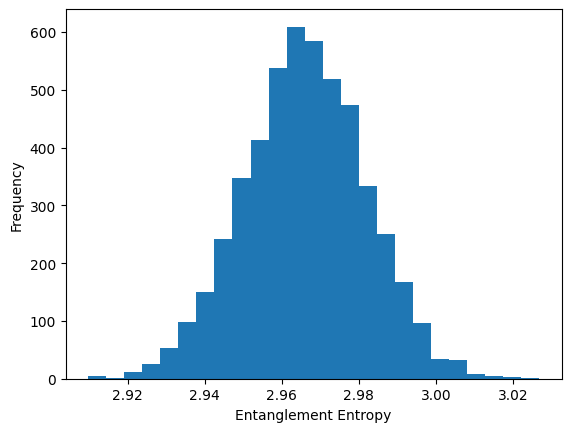

In [2]:
def haar_state(dim=2):
    state = np.array([normal()+1j*normal() for _ in range(dim)])
    return state/la.norm(state)

def half_entropy(state):
    dim = len(state)
    dimA = int(np.sqrt(dim))
    assert dimA == np.sqrt(dim)
    S = la.svd(state.reshape((dimA,dimA)),compute_uv=False)
    return sum(-np.log(S**2)*S**2)

def test_entanglement(samples,dim=2**10):
    results = [half_entropy(haar_state(dim)) for _ in range(samples)]
    return results


res=test_entanglement(5000)
plt.hist(res,bins=25)
plt.xlabel("Entanglement Entropy")
plt.ylabel("Frequency")
plt.show()